# Модуль 6. **Навчання без учителя**

In [2077]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

cmap = "tab10"

### Завдання 1

###### У цьому завданні вам потрібно завантажити датасет https://drive.google.com/file/d/1Zvz20Iqeia1eEtFbGa3NcIrt_SNSimP6/view?usp=share_link. 
###### Тут ви знайдете 2 файли - з двовимірним датасетом та датасетом mnist. Для кожного з них застосуйте алгоритм K-means для кластеризації. Щоб знайти оптимальну кількість кластерів, скористайтесь ліктевим методом.

    Завантаження даних

In [2078]:
df_2d = pd.read_csv("data/data_2d.csv", header=None, names=['class', 'feature_1', 'feature_2'])
df_mnist = pd.read_csv("data/mnist.csv", header=None)

    Аналіз даних df_2d

In [2079]:
df_2d.head()

,class,feature_1,feature_2
0,0.0,-0.768716,0.460860
1,0.0,2.687848,2.366961
2,0.0,-0.201379,0.470430
3,0.0,0.608496,1.225400
4,0.0,-0.082282,1.137218


In [2080]:
df_2d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   class      200 non-null    float64
 1   feature_1  200 non-null    float64
 2   feature_2  200 non-null    float64
dtypes: float64(3)
memory usage: 4.8 KB


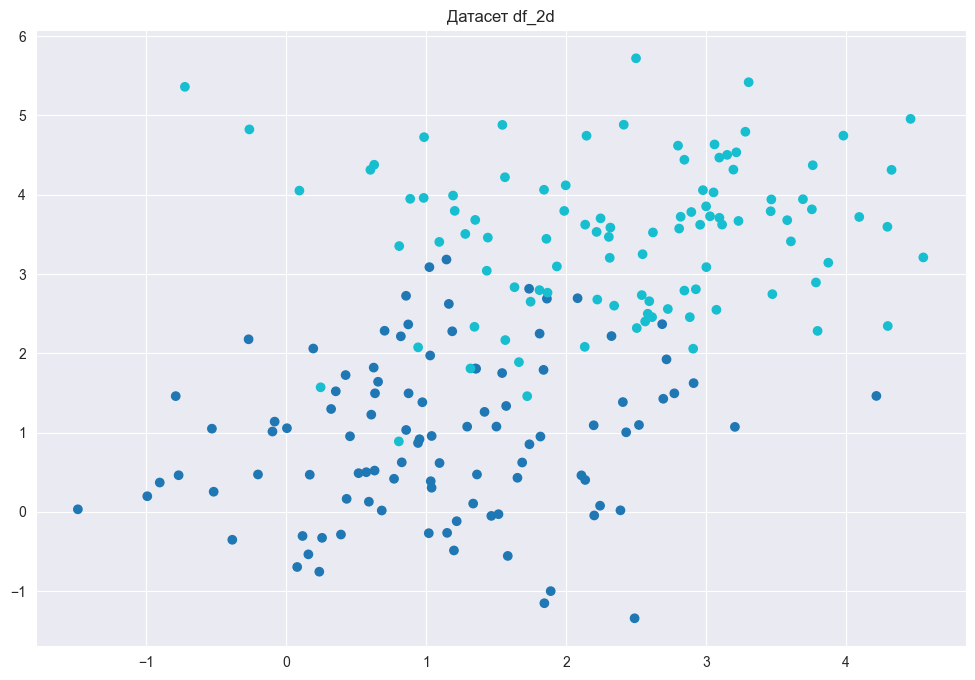

In [2081]:
plt.figure(figsize=(12, 8))
plt.scatter(
    x=df_2d.iloc[:, 1],
    y=df_2d.iloc[:, 2],
    c=df_2d.iloc[:, 0],
    edgecolor="face",
    cmap=cmap,
)
plt.title(f"Датасет df_2d")
plt.show()

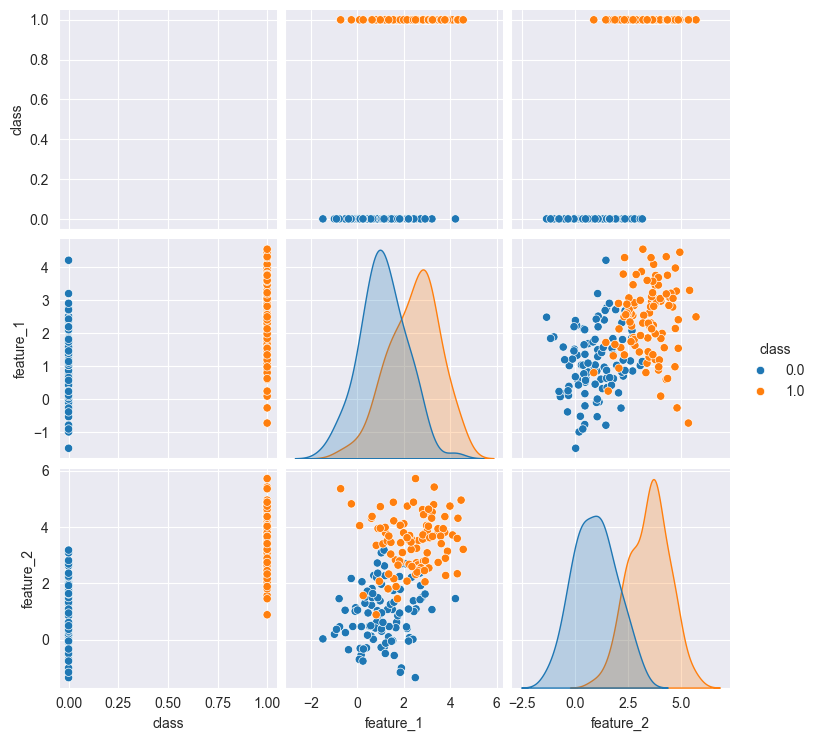

In [2082]:
sns.set_style("darkgrid")
features_to_analyse = ["class", "feature_1", "feature_2"]
sns.pairplot(df_2d, vars=features_to_analyse, hue="class")
plt.show()

    Аналіз даних df_mnist

In [2083]:
df_mnist.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [2084]:
df_mnist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Columns: 785 entries, 0 to 784
dtypes: int64(785)
memory usage: 3.0 MB


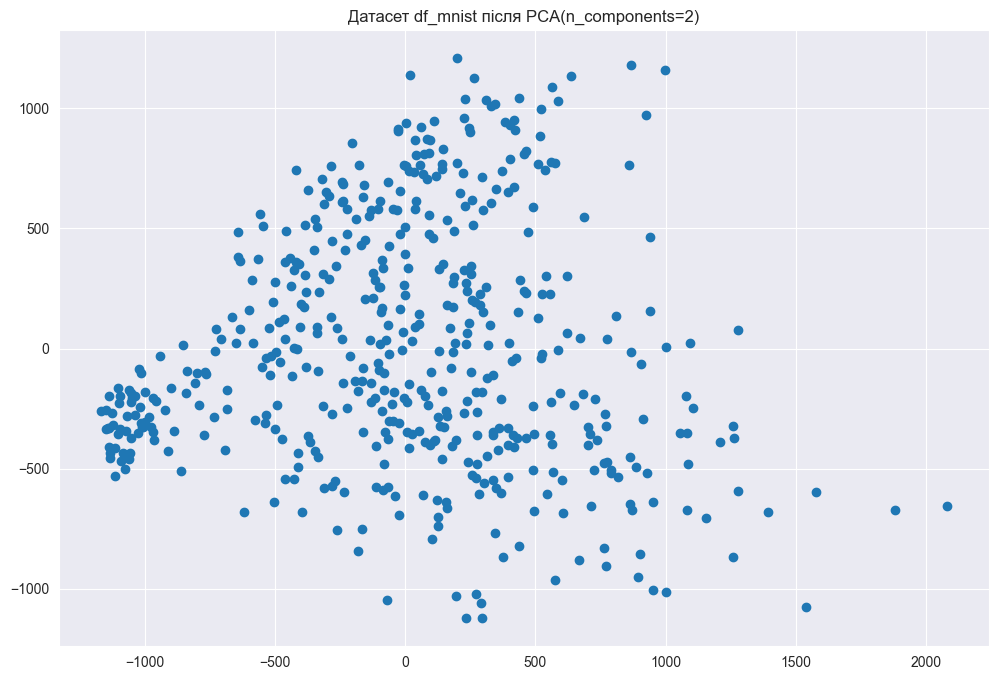

In [2085]:
pca = PCA(n_components=2)
df_mnist_pca = pca.fit_transform(df_mnist)

plt.figure(figsize=(12, 8))

plt.scatter(df_mnist_pca[:, 0], df_mnist_pca[:, 1])
plt.title(f"Датасет df_mnist після PCA(n_components=2)")
plt.show()

    функції


In [2086]:
def count_clusters(data, num):
    wcss = []
    for cluster in range(1, num + 1):
        kmeans = KMeans(
            n_clusters=cluster, init="k-means++", max_iter=300, n_init="auto", random_state=56,
        )
        kmeans.fit(data)
        wcss.append(kmeans.inertia_)
    return wcss


def plt_elbow_point(clusters, wcss):
    color_point = [
        "black", "yellow", "orange", "red", "green", "cyan", "blue", "purple",
        "magenta", "lime", "teal", "lavender", "salmon", "mediumaquamarine", "orangered",
        "brown", "royalblue", "olive", "peru", "aquamarine", "lightpink", "plum", "khaki",
    ]
    for cluster in clusters:
        plt.scatter(
            cluster, wcss[cluster - 1], c=color_point[cluster],
            edgecolors="face", linewidths=5, label=f"'Лікоть' для {cluster} кластерів",
        )


def plt_elbow_method(data, num, elbows=[]):

    wcss = count_clusters(data, num)

    if elbows != []:
        plt_elbow_point(elbows, wcss)
        plt.legend()

    plt.plot(range(1, num + 1), wcss, marker="x", linestyle="--")
    plt.xlabel("Кількість кластерів")
    plt.title(f"Метод ліктя\n range(1, {num})")
    plt.grid(True)


def plt_clusters(data, labels, centroids, num_cluster):

    colors_ = plt.cm.tab10(range(num_cluster))

    plt.figure(figsize=(12, 8))

    for cluster_label in range(num_cluster):
        plt.scatter(
            data[labels == cluster_label].iloc[:, 1],
            data[labels == cluster_label].iloc[:, 2],
            label=f"Кластер {cluster_label+1}",
            c=[colors_[cluster_label]], s=150, edgecolor="gray",
        )

    plt.scatter(
        centroids[:, 1], centroids[:, 2],  marker="x",
        s=230, c="black", linewidths=6, label="Центроїд",
    )

    for i, centroid in enumerate(centroids):
        plt.scatter(
            centroid[1], centroid[2], c=[colors_[i]], marker="x", linewidths=4, s=200,
        )

    plt.title(
        f"Результати кластеризації датасету df_2d для {num_cluster} кластерів"
    )
    plt.legend()
    plt.show()


def plt_clusters_mnist(data, labels, centroids, num_cluster):

    colors_ = plt.cm.tab10(range(num_cluster))

    plt.figure(figsize=(12, 8))

    for cluster_label in range(num_cluster):
        plt.scatter(
            data[labels == cluster_label][:, 0],
            data[labels == cluster_label][:, 1],
            label=f"Кластер {cluster_label+1}",
            c=[colors_[cluster_label]], s=150, edgecolor="gray",
        )

    plt.scatter(
        centroids[:, 0], centroids[:, 1], marker="x", s=230, c="black", linewidths=6, label="Центроїд",
    )

    for i, centroid in enumerate(centroids):
        plt.scatter(
            centroid[0], centroid[1], c=[colors_[i]], marker="x", linewidths=4, s=200,
        )

    plt.title(
        f"Результати кластеризації датасету df_mnist для {num_cluster} кластерів"
    )
    plt.legend()
    plt.show()

    визначення оптимальної кількості кластерів для df_2d

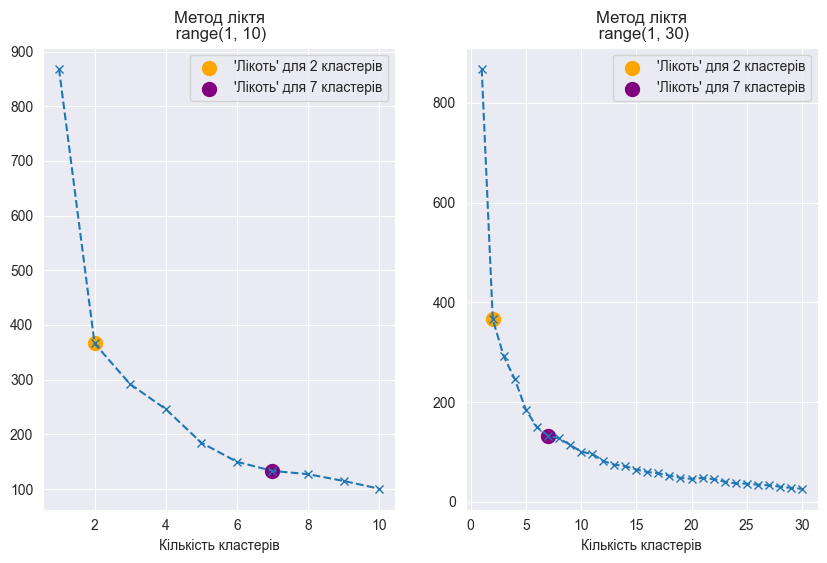

In [2087]:
plt.figure(figsize=(10, 6))

plt.subplot(121)
plt_elbow_method(df_2d, 10, [2, 7])

plt.subplot(122)
plt_elbow_method(df_2d, 30, [2, 7])

plt.show()

<div class="alert alert-block alert-info">
На різних масштабах графіку бачу два 'ліктя': при кількості кластерів 2 та 7
<p>Приймаємо обидва варіанти</p>
</div>

In [2088]:
optimal_num_clusters_2d = [2, 7]

    визначення оптимальної кількості кластерів для df_mnist

_до зменшення розмірності_

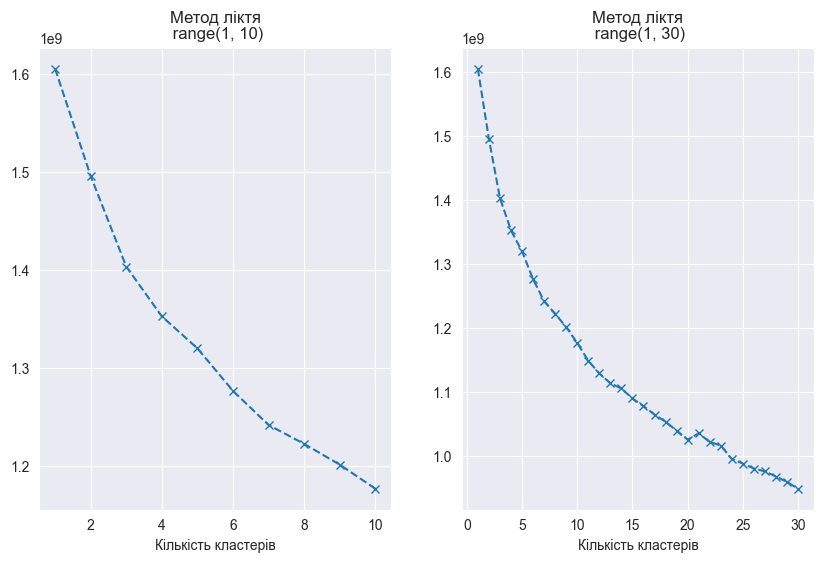

In [2089]:
plt.figure(figsize=(10, 6))

plt.subplot(121)
plt_elbow_method(df_mnist, 10)

plt.subplot(122)
plt_elbow_method(df_mnist, 30)

plt.show()

_після зменшення розмірності_

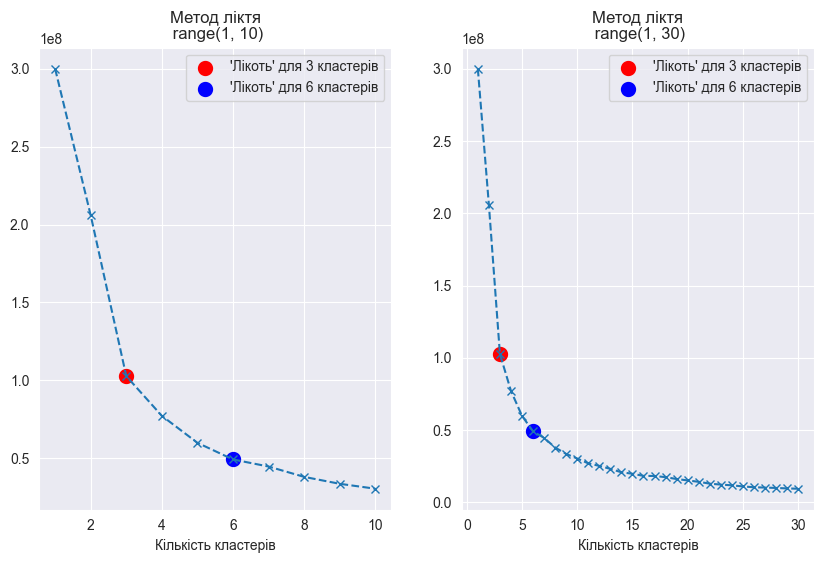

In [2090]:
plt.figure(figsize=(10, 6))

plt.subplot(121)
plt_elbow_method(df_mnist_pca, 10, [3, 6])

plt.subplot(122)
plt_elbow_method(df_mnist_pca, 30, [3, 6])

plt.show()

<div class="alert alert-block alert-info">
До зменшення розмірності датасета явні 'лікті' на графіку відсутні
<p>Після зменшення розмірності PCA(n_components=2) на графіках помітні два 'ліктя': при кількості кластерів 3 та 6</p>
</div>

In [2091]:
optimal_num_clusters_mnist = [3, 6]

### Завдання 2

###### Візуалізуйте результат роботи кластеризації. Для випадку з mnist датасетом, вам потрібно ще скористатись алгоритмом PCA щоб зменшити розмірність вашим даних до 2-вимірного варіанту.

    кластеризація для датасету df_2d

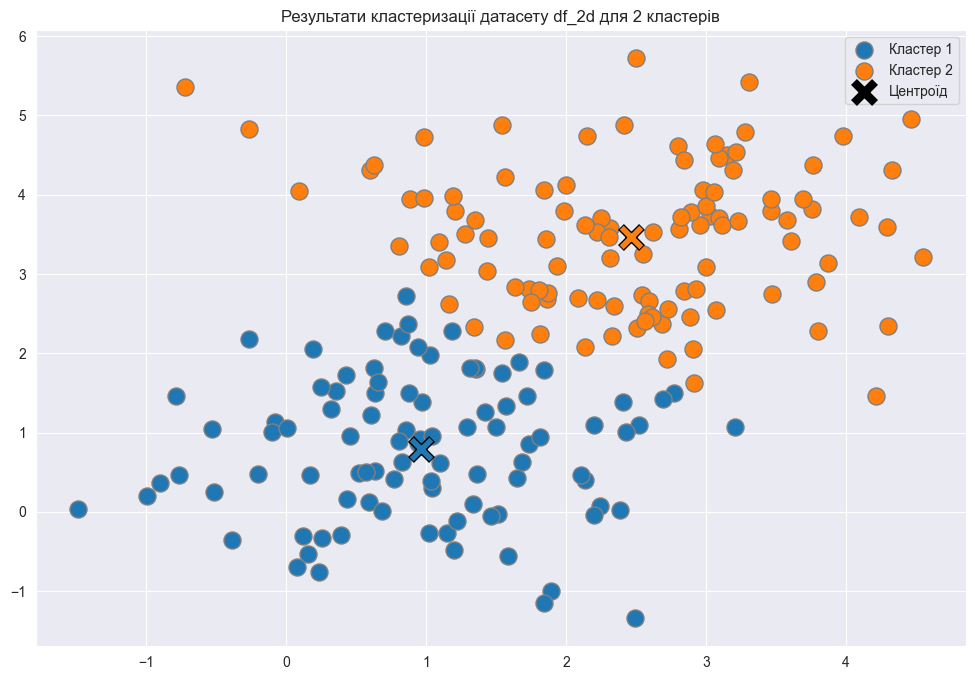

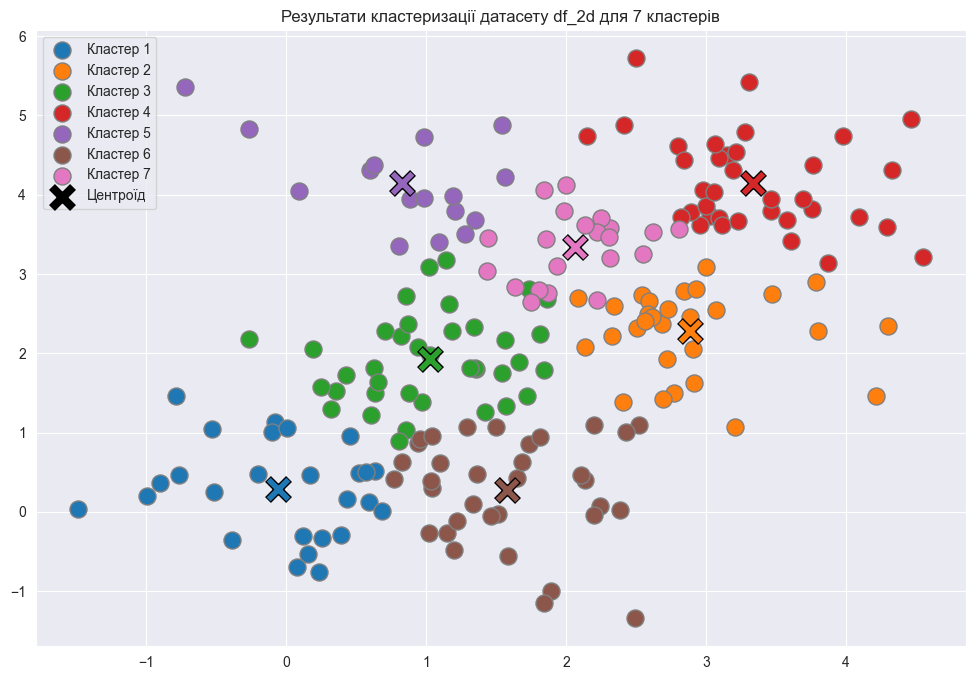

In [2092]:
for optimal_num_cluster in optimal_num_clusters_2d:

    kmeans = KMeans(
        n_clusters=optimal_num_cluster,
        n_init="auto",
        max_iter=300,
        init="k-means++",
        random_state=56,
    )
    kmeans.fit(df_2d)
    
    plt_clusters(df_2d, kmeans.labels_, kmeans.cluster_centers_, optimal_num_cluster)

    кластеризація для датасету df_mnist

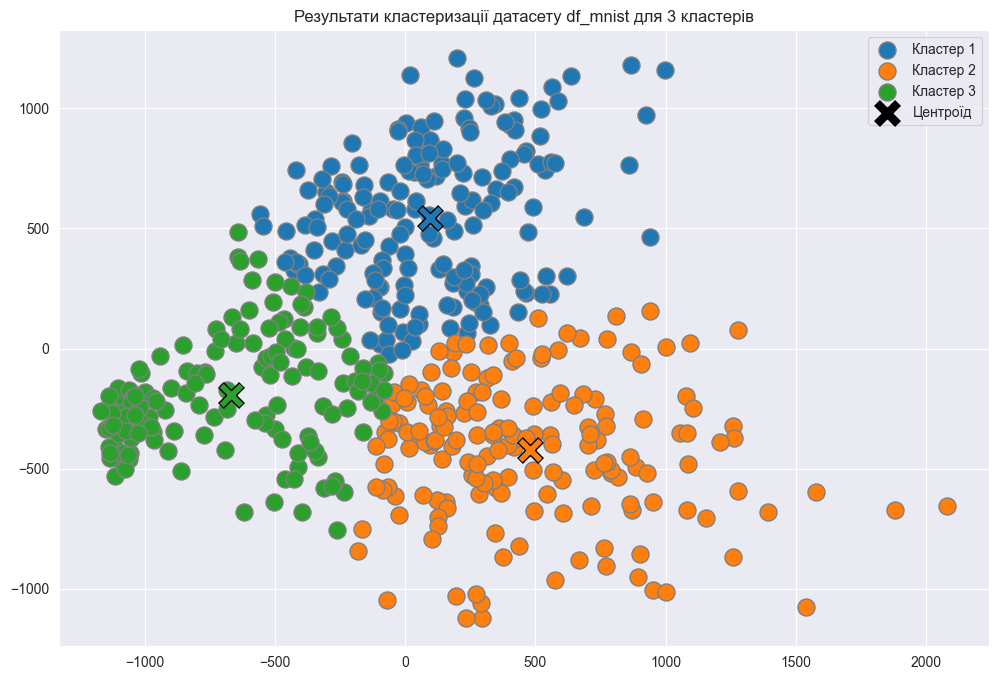

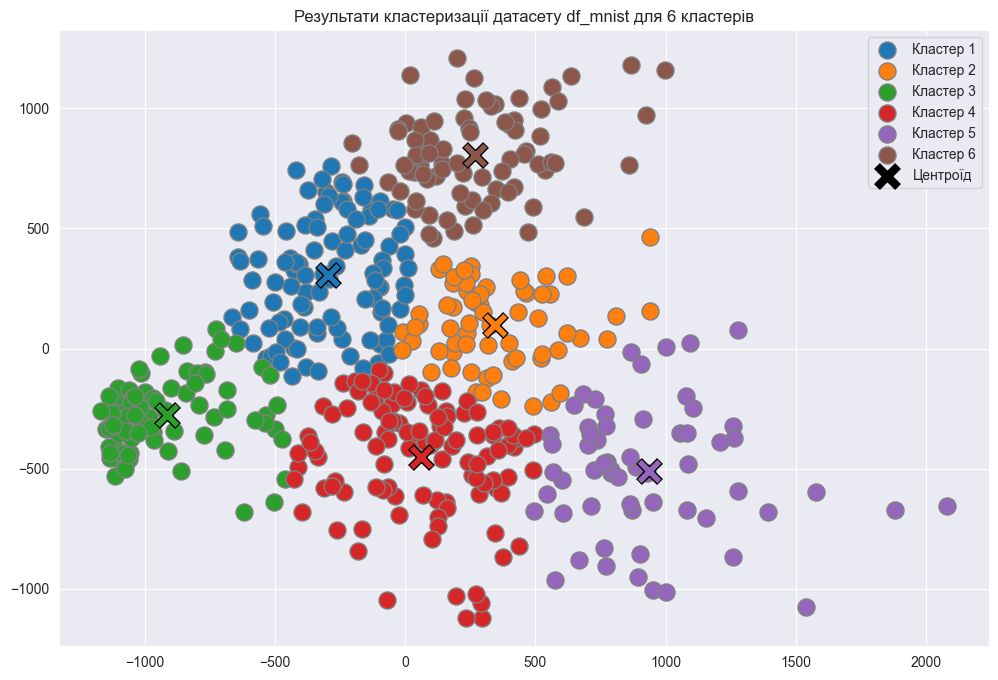

In [2093]:
for optimal_num_cluster in optimal_num_clusters_mnist:

    kmeans = KMeans(
        n_clusters=optimal_num_cluster,
        n_init="auto",
        max_iter=300,
        init="k-means++",
        random_state=56,
    )

    kmeans.fit(df_mnist_pca)

    plt_clusters_mnist(df_mnist_pca, kmeans.labels_, kmeans.cluster_centers_, optimal_num_cluster)

<div class="alert alert-block alert-info">
<b>Висновки:</b> 
<p>Для двох датасетів застосовано алгоритм K-means для кластеризації. Для визначення оптимальної кількості кластерів було застосовано ліктевий метод. <br>Для другого датасета додатково довелося застосувати алгоритм PCA для зменшення розмірності даних до 2-вимірного варіанту. <br>Результати кластеризації візуалізовано на графіках</p>
</div>